In [1]:
# https://www.kaggle.com/lodetomasi1995/income-classification
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO
from sklearn.model_selection import cross_val_score, ShuffleSplit, GridSearchCV, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint as pp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("~/Projects/omscs/ML/income_evaluation.csv")
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.dropna()
df = df.ffill()
df = df.bfill()
df.shape
df.columns = list(map(lambda x: x.strip(), df.columns))

In [3]:
# Convert the output class into buckets of low and high. Low is 0 and high is 1
df.columns
price_range = df[['income']].to_numpy()
price_range[price_range=="<=50K"] = 0
price_range[price_range==">50K"] = 1
y_new = pd.DataFrame(price_range, columns=['income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Do a one-hot encoding of string features - otherwise the predict method will fail
for i in df.columns:
    if i in ['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']:
        df[i] = LabelEncoder().fit_transform(df[i])

In [5]:
X = df.drop(columns=['income'])
y = y_new
y = df[['income']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Use min max scaling because input dataset is sparse, i.e. mostly zeros
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
clf = MLPClassifier(random_state=1)
start_time = time.time()
clf.fit(x_train_scaled, y_train['income'])
print(f"DT Normal Model: Fit Time: {time.time() - start_time}")
start_time = time.time()
y_pred = clf.predict(x_test_scaled)
print(f"DT Normal Model: Fit Time: {time.time() - start_time}")
print(f"Score of Model Tree are (Mean Accuracy of test and train data): {clf.score(x_test_scaled, y_test)}")

DT Normal Model: Fit Time: 20.627898931503296
DT Normal Model: Fit Time: 0.012762069702148438
Score of Model Tree are (Mean Accuracy of test and train data): 0.8470750806080147


/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (21) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (22) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (23) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarni

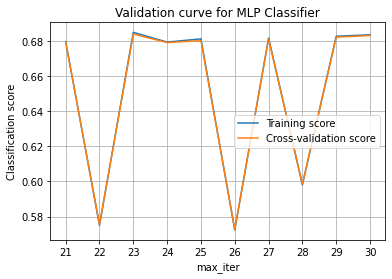

In [14]:
# Initial Validation Curve
# Your MLP didn't converge: 
# The algorithm is optimizing by a stepwise convergence to a minimum and in run 1 your minimum wasn't found.
depth_range = np.arange(20, 30) + 1
param = "max_iter"
classifier = "MLP Classifier"
train_scores, test_scores = validation_curve(clf, x_train, y_train['income'], param_name=param, param_range=depth_range, cv=5)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title(f'Validation curve for {classifier}')
plt.xlabel(param)
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score
crossValScores = cross_val_score(clf, X, y['income'], cv=5)
print("Cross Valuation Scores for unpruned tree are ", crossValScores)
print("Mean accuracy score is ", crossValScores.mean())
print("Std accuracy score is ", crossValScores.std())

/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y 

Cross Valuation Scores for unpruned tree are  [0.25257178 0.78808354 0.79514742 0.76934889 0.78531941]
Mean accuracy score is  0.67809420848343
Std accuracy score is  0.21292867638749025


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      4935
        >50K       0.70      0.64      0.67      1578

    accuracy                           0.85      6513
   macro avg       0.79      0.78      0.79      6513
weighted avg       0.84      0.85      0.84      6513



In [11]:
print(confusion_matrix(y_test, y_pred))

[[4500  435]
 [ 561 1017]]


In [13]:
# To make the results deterministic - we need to use random_state
pipelineA = Pipeline([('scaler', StandardScaler()), 
                      ('mlp', MLPClassifier(random_state=1))])
start_time = time.time()
p = pipelineA.fit(x_train, y_train['income'])
print(f"MLP Pipeline Model: Fit Time: {time.time() - start_time}")
start_time = time.time()
y_pred_pipelineA = p.predict(x_test)
print(f"MLP Pipeline Model: Predict Time: {time.time() - start_time}")
# print(confusion_matrix(y_test, y_pred_pipelineA))
# print(classification_report(y_test, y_pred_pipelineA))

MLP Pipeline Model: Fit Time: 29.368712902069092
MLP Pipeline Model: Predict Time: 0.00850987434387207


/Users/nitarora/Projects/KBAI-Assignment1/venv/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
d = x_train.shape[1]
param = {'mlp__hidden_layer_sizes': [(h,)*l for l in [1,2,3] for h in [d,d//2,d*2]], 
         'mlp__alpha': [10**-x for x in np.arange(1, 10.0, 0.5)],
         'mlp__activation': ['relu', 'logistic', 'tanh'],
         'mlp__solver': ['adam', 'sgd', 'lbfgs'], 
         'mlp__learning_rate': ['constant', 'invscaling', 'adaptive']
        }
clf_cv = GridSearchCV(pipelineA, n_jobs=-1, param_grid=param, refit=True, cv=5, return_train_score=True, verbose=1)
start_time = time.time()
clf_cv = clf_cv.fit(x_train, y_train)
print(f"DT CV Model: Fit Time: {time.time() - start_time}")
start_time = time.time()
y_pred_pipeline_cv = clf_cv.predict(x_test)
print(f"DT CV Model: Predict Time: {time.time() - start_time}")
clf_cv.best_params_

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 33.1min


In [ ]:
# Initial learning curve
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(clf_cv, x_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for decision tree')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()